# TITANIC DISASTER ANALYSIS

#### The project 'Titanic Disaster Analysis' has a main objective of analysing the provided dataset and be able to come up with a model predicting the possibilty of some classes of people surviving in the titatic disaster Understand the Dataset & perform all data pre-processing.Build a strong classification model to predict whether the passenger survives or not.Also fine-tune the hyperparameters & compare the evaluation metrics of variousclassification algorithms.

## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [94]:
pd.read_csv("Titanic-Dataset.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
# we want to rename our dataset "Titanic-Dataset" to df
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis (EDA)

In [98]:
# want to view the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
# last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [102]:
# have a random sample of our dataset
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


In [104]:
# lets ee the shape of our data, no of columns and rows
df.shape
# from the code above, its clear that we have 891 rows/observations and 12 columns

(891, 12)

In [106]:
# we could be first be interested to know our columns since they are the pivot of our analysis
# lets have an overview of our columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
# know the size of our dataset
df.size

10692

In [110]:
# have an overview of the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### we have 12 columns and 891 columns,there are some missing values in 'Age", 'Cabin' and 'Embarked', we have three datatypes in our data(float, int and object) also we can the memeory usage

In [112]:
# some quick descriptive statistics
# displays for variable with int datatype alone
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### From the results above, we can clearly see the count/number, mean, starndard deviation, minimum value, median, lower and upper quartiles and consequently the maximum value.

In [114]:
# we could also have some statistics for the object-datatype variable
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [24]:
# descriptive statistics for all variables
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [25]:
# could there be any missing values, let's dive
# just to check for the whole dataset before we narrow down to variable
# if 'True', then we have missing values
#df.isna().sum()

In [26]:
type("Survived")

str

In [116]:
# from the df.info() we had age, cabin and embarked to be having missing values
# we confirm for Age
df.Age.isna().sum()
# we have a total of 177 missing values in the variable Age

177

In [118]:
# from the df.info() we had age, cabin and embarked to be having missing values
# we confirm for Cabin
df.Cabin.isna().sum()
# we have a total of 687 missing values in the variable Cabin

687

In [29]:
# from the df.info() we had age, cabin and embarked to be having missing values
# we confirm for Embarked
df.Embarked.isna().sum()
# we have a total of 2 missing values in the variable Embarked

2

In [30]:
type("Age")

str

In [120]:
# Let's fill the Nan(null) values in the "Age" column
x = df["Age"].mean()
df["Age"].fillna(x, inplace= True)

In [83]:
# now for Age, we can use the mean to impute the missing values
#df.Age.fillna(df.Age.median,inplace=True)

In [122]:
# lets confirm whether we have imputed for age
# the sum of missing values should be zero
df.Age.isna().sum() 

0

In [124]:
# Let's drop/delete the "Cabin" column
df.drop(["Cabin"], axis = 1, inplace=True)

In [126]:
# to accertain the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Data Analysis/Vizualizations

In [128]:
# to find the number of males and females in the dataset
gender=df.Sex.value_counts()

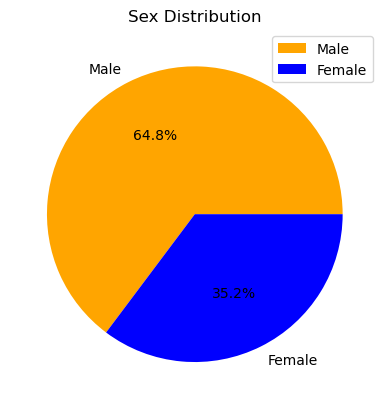

In [130]:
# have a pie plot to show the proportions of males to females
#df["Sex"].plot(kind='pie",figsize=(5,5
plt.pie(gender, labels = ["Male", "Female"], autopct= "%.1f%%", colors=["orange", "blue"]) # The plt.pie() expects the numerical values
plt.legend()
plt.title("Sex Distribution")

plt.show()

In [145]:
# show the number of female and male who survived the titanic and those who didnt
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

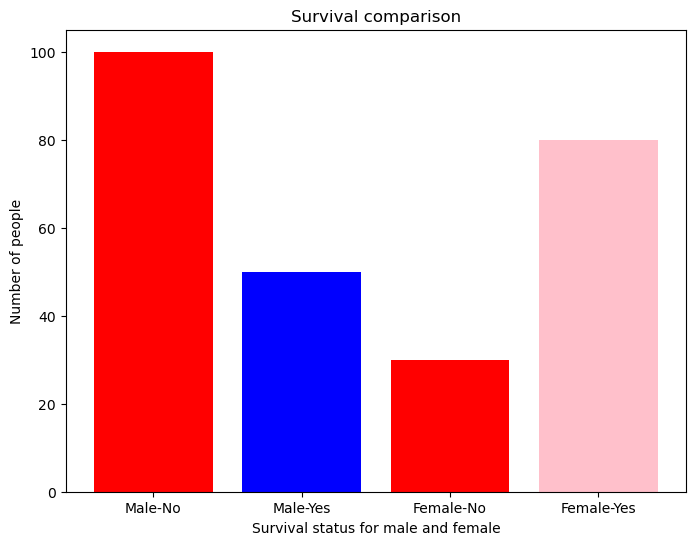

In [132]:
# Let's compare how many male/female survived r not
Actual_data = {"Survived": ["Male-No", "Male-Yes", "Female-No", "Female-Yes"],
              "Count": [100, 50, 30, 80]} # Replace it with the actual counts

Survived = pd.DataFrame(Actual_data)

plt.figure(figsize= (8,6))
plt.bar(Survived["Survived"], Survived["Count"], color = ["red", "blue", "red", "pink"])
plt.xticks(Survived["Survived"])
plt.title("Survival comparison")
plt.xlabel("Survival status for male and female")
plt.ylabel("Number of people")

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

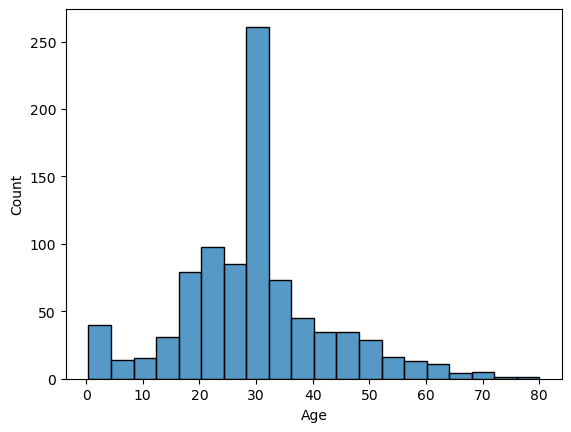

In [138]:
sns.histplot(data=df,x="Age",bins=20)

##### most of the people involved in the titanic were 30 yrs old

In [157]:
#to find the percentage of people from every port embarkation
embarked=df.Embarked.value_counts(normalize=True)*100

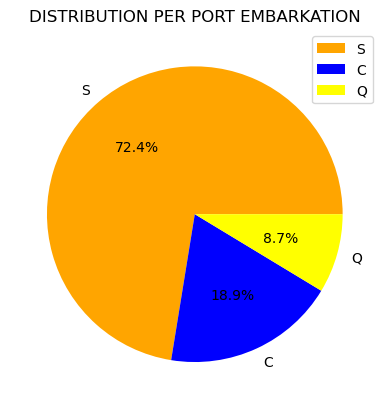

In [161]:
# show distribution of the pops frm diff port embarkation in percentages
plt.pie(embarked, labels = ["S", "C","Q"], autopct= "%.1f%%", colors=["orange", "blue","yellow"]) # The plt.pie() expects the numerical values
plt.legend()
plt.title("DISTRIBUTION PER PORT EMBARKATION")

plt.show()

From the above graph, the Southamptom port embarkation was the leading with a population of 72.4% followed by Cherbourg with 18.9% and finally Queenstaw with 8.7%

In [182]:
# no of  survivors per embarkation
Survived_embarked=df[["Embarked",'Survived']].value_counts().reset_index()
Survived_embarked

,Embarked,Survived,count
0,S,0,427
1,S,1,217
2,C,1,93
3,C,0,75
4,Q,0,47
5,Q,1,30


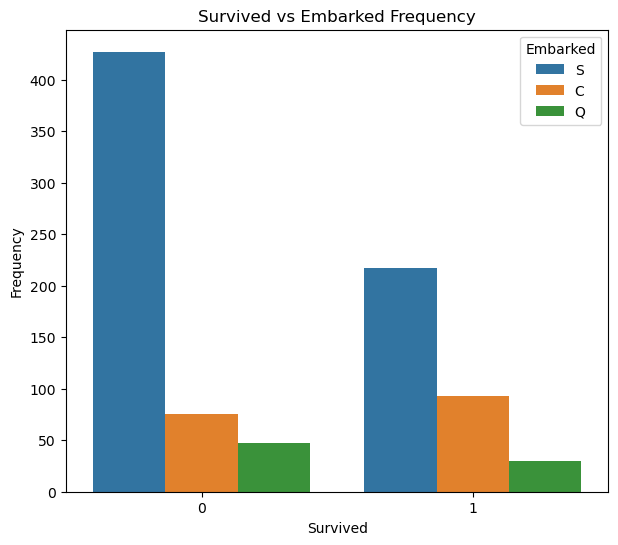

In [186]:
plt.figure(figsize= (7,6))
sns.barplot(data=Survived_embarked, x=Survived_embarked["Survived"], y=Survived_embarked["count"], hue=Survived_embarked["Embarked"])
plt.title("Survived vs Embarked Frequency")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

In [216]:
# No of survivors per ticket class
Survived_Pclass = df[["Survived", "Pclass"]].value_counts().reset_index()
Survived_Pclass

,Survived,Pclass,count
0,0,3,372
1,1,1,136
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


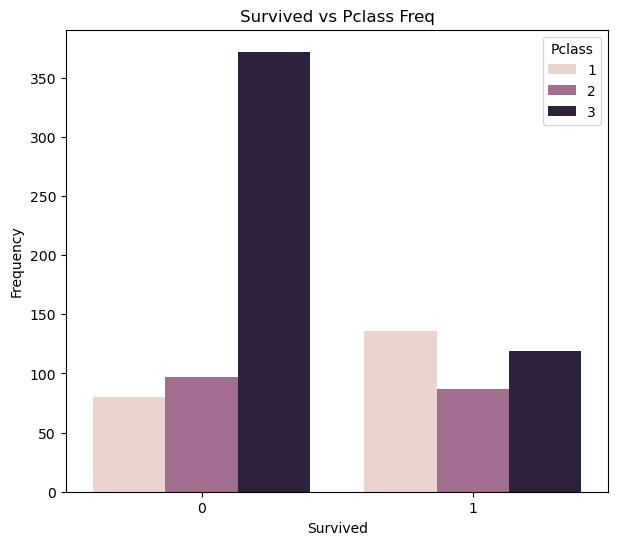

In [222]:
plt.figure(figsize= (7,6))
sns.barplot(data=Survived_Pclass, x=Survived_Pclass["Survived"], y=Survived_Pclass["count"], hue=Survived_Pclass["Pclass"])
plt.title("Survived vs Pclass Freq")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

## The Model

In [225]:
# Let's drop some columns
model= df.drop(["PassengerId", "Name", "Ticket"], axis=1)
model

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [227]:
# Let's use the LabelEncoder
# since models do not understand strings, hence the encoding
#label_encoder transforms categorical value to a numeric value between 0 and the number of classes minus 1
label_encoder = LabelEncoder()

In [229]:
model["Sex"] = label_encoder.fit_transform(model["Sex"])
model["Embarked"] = label_encoder.fit_transform(model["Embarked"])

In [231]:
model

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [233]:
# let's drop a the survived column
x = model.drop(["Survived"], axis=1)
y = model["Survived"]

In [241]:
#For neural networks you have input features (X) and output labels (Y). 
#It's very important to split your data into a training dataset and testing dataset.
#To make this easy sklearn has a function called 
#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None).
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

## Logistic Regression()

Now that we have imported the logistic regeression model, we gonna use it

In [295]:
logistic= LogisticRegression()
logistic

LogisticRegression()

In [303]:

model_logistic = LogisticRegression()

In [305]:
# fitting the model to the training data
model_logistic.fit(X_train, Y_train)

LogisticRegression()

In [311]:
# evaluate the perfomance of the logistic regression model on the training data
model_logistic.score(X_train, Y_train)

0.7823033707865169

In [309]:
# evaluate the perfomance of the model on the testing data
model_logistic.score(x_test, y_test)

0.8715083798882681

## RandomForestClassifier()

In [315]:
model_random = RandomForestClassifier()

In [317]:
model_random.fit(X_train, Y_train)

RandomForestClassifier()

In [319]:
model_random.score(X_train, Y_train)

0.9831460674157303

In [321]:
model_random.score(x_test, y_test)

0.8212290502793296